In [4]:
from data_split import *
from feature_engineering import *
from matrix_tools import *
from model import *
from opti_tools import *

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/student/student-por.csv',sep=';')

In [7]:
encoder = OH()
split = RandomSplit()
PCA = PrincipalComponentAnalysis() # Question : Why if i apply PCA on the entire dataset (target included) I get a perfect score?
log = LogTransformation()

df = encoder.apply_transformation(df)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,0,4,3,2,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,16,3,3,1,2,0,4,3,2,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [8]:
X_train, X_test, y_train, y_test = split.split_data(df)
X_train = log.apply_transformation(X_train)
X_test = log.apply_transformation(X_test)


In [9]:
model = LassoRegression()
theta = model.train_model(X_train, y_train,1)
y_pred=model.predict(X_test, theta)

ValueError: Unable to coerce to Series, length must be 3: given 519

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')

MSE: 7.409390266670688


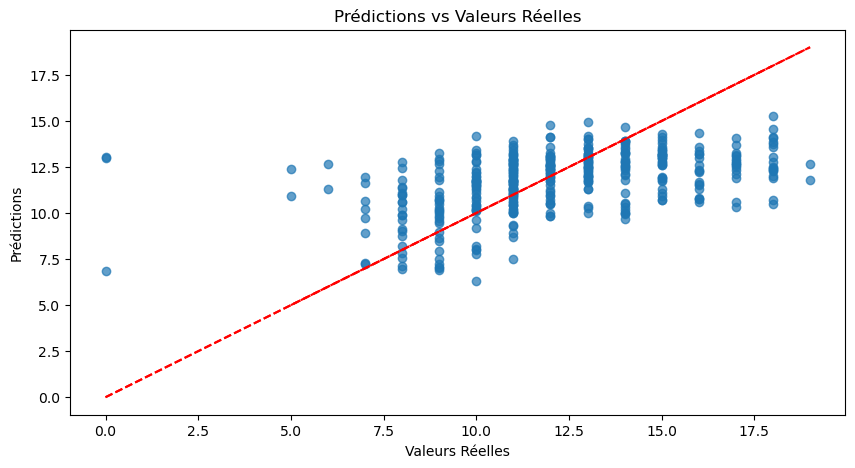

In [27]:
# Visualiser les prédictions par rapport aux valeurs réelles
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs Réelles')
plt.show()